# Neural Network Model(Inception Net)




In [1]:
from keras.layers import Dense, Dropout, Conv3D, Input, Flatten, Activation, MaxPooling3D
from keras.layers import concatenate, BatchNormalization, add, AveragePooling3D, GlobalAveragePooling3D
from keras.regularizers import l2
from keras.models import Model


def conv2d_bn(x, nb_filter, kernel=(3, 3, 3), dropout_rate=0., weight_decay=0.005):
    x = Conv3D(nb_filter, kernel,
               kernel_initializer='he_normal',
               padding="same",
               use_bias=False,
               kernel_regularizer=l2(weight_decay))(x)
    x = BatchNormalization(axis=-1, epsilon=1.1e-5)(x)
    x = Activation('relu')(x)
    if dropout_rate:
        x = Dropout(dropout_rate)(x)
    return x


def inception_3d(nb_classes = 2, input_shape = (32, 32, 32, 1), drop_rate=0.2):
    model_input = Input(shape=input_shape)

    # 112x112x8
    # stage 1 Initial convolution
    x = conv2d_bn(model_input, 64, (3, 3, 3))
    x = MaxPooling3D((2, 2, 1), strides=(2, 2, 1), padding='same')(x)
    # 56x56x8

    # stage 1
    branch1 = conv2d_bn(x, 32, (1, 1, 1))

    branch2 = conv2d_bn(x, 32, (1, 1, 1))
    branch2 = conv2d_bn(branch2, 32, (5, 5, 3))

    branch3 = conv2d_bn(x, 32, (1, 1, 1))
    branch3 = conv2d_bn(branch3, 32, (3, 3, 3))
    branch3 = conv2d_bn(branch3, 32, (3, 3, 3))

    branch4 = AveragePooling3D(pool_size=(2, 2, 2), strides=(1, 1, 1), padding='same')(x)
    branch4 = conv2d_bn(branch4, 32, (1, 1, 1))

    x = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='same')(x)
    # 28x28x4

    # stage 2
    branch1 = conv2d_bn(x, 32, (1, 1, 1))

    branch2 = conv2d_bn(x, 32, (1, 1, 1))
    branch2 = conv2d_bn(branch2, 32, (5, 5, 3))

    branch3 = conv2d_bn(x, 32, (1, 1, 1))
    branch3 = conv2d_bn(branch3, 32, (3, 3, 3))
    branch3 = conv2d_bn(branch3, 32, (3, 3, 3))

    branch4 = AveragePooling3D(pool_size=(2, 2, 2), strides=(1, 1, 1), padding='same')(x)
    branch4 = conv2d_bn(branch4, 32, (1, 1, 1))

    x = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='same')(x)
    # 14x14x2

    # stage 3
    branch1 = conv2d_bn(x, 64, (1, 1, 1))

    branch2 = conv2d_bn(x, 64, (1, 1, 1))
    branch2 = conv2d_bn(branch2, 64, (5, 5, 3))

    branch3 = conv2d_bn(x, 64, (1, 1, 1))
    branch3 = conv2d_bn(branch3, 64, (7, 1, 3))
    branch3 = conv2d_bn(branch3, 64, (1, 7, 3))

    branch4 = AveragePooling3D(pool_size=(2, 2, 2), strides=(1, 1, 1), padding='same')(x)
    branch4 = conv2d_bn(branch4, 64, (1, 1, 1))

    x = concatenate([branch1, branch2, branch3, branch4], axis=-1)

    branch1 = conv2d_bn(x, 64, (1, 1, 1))

    branch2 = conv2d_bn(x, 64, (1, 1, 1))
    branch2 = conv2d_bn(branch2, 64, (5, 5, 3))

    branch3 = conv2d_bn(x, 64, (1, 1, 1))
    branch3 = conv2d_bn(branch3, 64, (7, 1, 3))
    branch3 = conv2d_bn(branch3, 64, (1, 7, 3))

    branch4 = AveragePooling3D(pool_size=(2, 2, 2), strides=(1, 1, 1), padding='same')(x)
    branch4 = conv2d_bn(branch4, 64, (1, 1, 1))

    x = concatenate([branch1, branch2, branch3, branch4], axis=-1)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2), padding='same')(x)
    # 7x7x1

    # stage 4
    branch1 = conv2d_bn(x, 64, (1, 1, 1))

    branch2 = conv2d_bn(x, 64, (1, 1, 1))
    branch2 = conv2d_bn(branch2, 64, (3, 3, 1))

    branch3 = conv2d_bn(x, 64, (1, 1, 1))
    branch3 = conv2d_bn(branch3, 64, (7, 1, 1))
    branch3 = conv2d_bn(branch3, 64, (1, 7, 1))

    branch4 = AveragePooling3D(pool_size=(2, 2, 1), strides=(1, 1, 1), padding='same')(x)
    branch4 = conv2d_bn(branch4, 64, (1, 1, 1))

    x = concatenate([branch1, branch2, branch3, branch4], axis=-1)

    branch1 = conv2d_bn(x, 64, (1, 1, 1))

    branch2 = conv2d_bn(x, 64, (1, 1, 1))
    branch2 = conv2d_bn(branch2, 64, (3, 3, 1))

    branch3 = conv2d_bn(x, 64, (1, 1, 1))
    branch3 = conv2d_bn(branch3, 64, (7, 1, 1))
    branch3 = conv2d_bn(branch3, 64, (1, 7, 1))

    branch4 = AveragePooling3D(pool_size=(2, 2, 1), strides=(1, 1, 1), padding='same')(x)
    branch4 = conv2d_bn(branch4, 64, (1, 1, 1))

    x = concatenate([branch1, branch2, branch3, branch4], axis=-1)

    x = conv2d_bn(x, 256, (1, 1, 1))

    x = GlobalAveragePooling3D()(x)
    x = Dense(nb_classes,
              activation='softmax',
              kernel_regularizer=l2(0.005),
              bias_regularizer=l2(0.005))(x)
    model = Model(inputs=model_input, outputs=x)
    return model

In [2]:
def get_compiled(loss='categorical_crossentropy', optimizer='adam',
                 weights=None, **kwargs):
    metrics = ["categorical_accuracy"]
    model = inception_3d()
    model.compile(loss=loss, optimizer=optimizer,
                  metrics=[loss] + metrics)
    
    return model

# Data Pre-processing and Augmentation

In [3]:
import numpy as np
from tensorflow import keras
import csv
import random
from matplotlib import pyplot as plt


# data augment
def rotation(array, angle):
    X = np.rot90(array, angle[0], axes=(0, 1))  # rotate in X-axis
    Y = np.rot90(X, angle[1], axes=(0, 2))  # rotate in Y'-axis
    Z = np.rot90(Y, angle[2], axes=(1, 2))  # rotate in Z"-axis
    return Z


def reflection(array, axis):
    if axis != -1:
        ref = np.flip(array, axis)
    else:
        ref = np.copy(array)
    return ref


def augment(x_train, y_train):
    print(np.size(x_train, 0))
    for i in range(0, np.size(x_train, 0)):
        angle = (random.randint(0, 3), random.randint(0, 3), random.randint(0, 3))
        rotated_data = rotation(x_train[i], angle)
        axis = random.randint(-1, 2)
        flipped_data = reflection(x_train[i], axis)
        # for j in range(0, 32, 2):
        #     plt.figure()
        #     plt.subplot(1, 3, 1)
        #     plt.imshow(rotated_data[j])
        #     plt.subplot(1, 3, 2)
        #     plt.imshow(flipped_data[j])
        #     plt.subplot(1, 3, 3)
        #     plt.imshow(x_train[i][j])
        #     plt.show()
        x_train = np.append(x_train, np.expand_dims(rotated_data, axis=0), axis=0)
        x_train = np.append(x_train, np.expand_dims(flipped_data, axis=0), axis=0)
        y_train = np.append(y_train, np.expand_dims(y_train[i], axis=0), axis=0)
        y_train = np.append(y_train, np.expand_dims(y_train[i], axis=0), axis=0)
    return x_train, y_train


def load_label():
    path = 'drive/MyDrive/dataset2/train_val.csv'
    y_train = np.loadtxt(path, int, delimiter=",", skiprows=1, usecols=1)
    print('Labels loaded')
    return y_train

import pandas as pd

# load feature original=1->return the augmented data
def load_data(aug=False):
    focus = 16
    x_train = np.ones((365, 2 * focus, 2 * focus, 2 * focus))
    j = 0
    candidates = pd.read_csv('drive/MyDrive/dataset2/train_val.csv')['name']
    for c in candidates:
      a = 'drive/MyDrive/dataset2/train_val/' + c + '.npz'
      tmp = np.load(a)
      voxel = tmp['voxel']
      seg = tmp['seg']
      x_train[j] = (voxel * seg)[50 - focus:50 + focus, 50 - focus:50 + focus, 50 - focus:50 + focus]
      j = j + 1
    # for i in range(0, 480):
    #     a = 'drive/MyDrive/dataset2/train_val/candidate' + str(i) + '.npz'
    #     try:
    #         tmp = np.load(a)
    #         voxel = tmp['voxel']
    #         seg = tmp['seg']
    #         x_train[j] = (voxel * seg)[50 - focus:50 + focus, 50 - focus:50 + focus, 50 - focus:50 + focus]
    #         j = j + 1
    #     except:
    #         continue
    y_train = load_label()
    if aug is False:
        x_train = x_train.reshape(x_train.shape[0], 2 * focus, 2 * focus, 2 * focus, 1)
        y_train = keras.utils.to_categorical(y_train, 2)
        return x_train, y_train
    x_train, y_train = augment(x_train, y_train)
    x_train, y_train = mix_up(x_train, y_train)
    x_train = x_train.reshape(x_train.shape[0], 2 * focus, 2 * focus, 2 * focus, 1)
    y_train = keras.utils.to_categorical(y_train, 2)
    return x_train, y_train


def mix_up(x_train, y_train, increment=400):
    t = 0.5
    x = np.ones((increment, 32, 32, 32))
    y = np.ones(increment)
    i = 0
    size = np.size(x_train, 0)
    while i < increment:
        m = random.randint(0, size - 1)
        n = random.randint(0, size - 1)
        if y_train[m] == y_train[n]:
            x[i] = (t * x_train[m] + (1 - t) * x_train[n]).copy()
            y[i] = (t * y_train[m] + (1 - t) * y_train[n]).copy()
            i = i + 1
    # i = 0
    # for j in range(0, 32, 2):
    #     plt.figure()
    #     plt.subplot(1, 2, 1)
    #     plt.imshow(x[i][j])
    #     plt.subplot(1, 2, 2)
    #     plt.imshow(x_train[i][j])
    #     plt.show()
    final_x = np.append(x_train, x, axis=0)
    final_y = np.append(y_train, y)
    return final_x, final_y


# Self-Customized AUC Score Callback

In [4]:
# use sckit-learn to build the evaluation function
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback

AUC_Scores = []

class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()
        self.interval = interval
        self.x_val,self.y_val = validation_data
    def on_epoch_end(self, epoch, log={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.x_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print('\n ROC_AUC - epoch:%d - score:%.6f' % (epoch+1, score))
            AUC_Scores.append(score)
            


# Connect to Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Training Function

In [6]:
def train_model(x_train, y_train, x_val, y_val, epoch, batch_size, save_weight_path, load_weight_path):

  RocAuc = RocAucEvaluation(validation_data=(x_val, y_val), interval=1)

  tf.compat.v1.disable_eager_execution()

  # compile model
  model = get_compiled()
  # model_path = 'tmp/weights0618.09.h5'
  # model.load_weights(model_path)

  if load_weight_path != '':
    model.load_weights(load_weight_path)
    
    print("Weight Loaded! " + load_weight_path)
  # train
  checkpointer = ModelCheckpoint(filepath= save_weight_path + '.{epoch:02d}.h5', verbose=1,
                                  period=1, save_weights_only=True)
  history = model.fit(x_train,
            y_train,
            epochs=epoch,
            validation_data=(x_val, y_val),
            shuffle=True,
            batch_size=batch_size,
            callbacks=[RocAuc,checkpointer]
            )
  return history

# Train with Original Data

Labels loaded
Labels loaded
(365, 32, 32, 32, 1) (365, 2)
(365, 32, 32, 32, 1) (365, 2)


Train on 365 samples, validate on 365 samples
Epoch 1/30
365/365 [==============================] - ETA: 0s - loss: 24.8518 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.5260

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



 ROC_AUC - epoch:1 - score:0.623988

Epoch 1: saving model to drive/MyDrive/res_tmp/inc_weights1211_original_data.01.h5
365/365 [==============================] - 66s 180ms/sample - loss: 24.8518 - categorical_crossentropy: 0.7702 - categorical_accuracy: 0.5260 - val_loss: 24.0526 - val_categorical_crossentropy: 1.8708 - val_categorical_accuracy: 0.5397
Epoch 2/30
365/365 [==============================] - ETA: 0s - loss: 21.0982 - categorical_crossentropy: 0.6874 - categorical_accuracy: 0.5945
 ROC_AUC - epoch:2 - score:0.375937

Epoch 2: saving model to drive/MyDrive/res_tmp/inc_weights1211_original_data.02.h5
365/365 [==============================] - 6s 17ms/sample - loss: 21.0982 - categorical_crossentropy: 0.6874 - categorical_accuracy: 0.5945 - val_loss: 21.5399 - val_categorical_crossentropy: 3.0384 - val_categorical_accuracy: 0.4603
Epoch 3/30
365/365 [==============================] - ETA: 0s - loss: 17.5775 - categorical_crossentropy: 0.6591 - categorical_accuracy: 0.6411
 

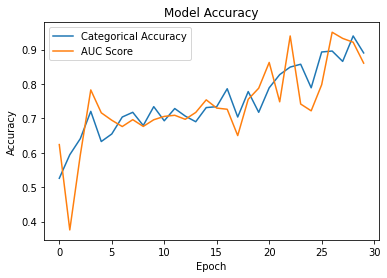

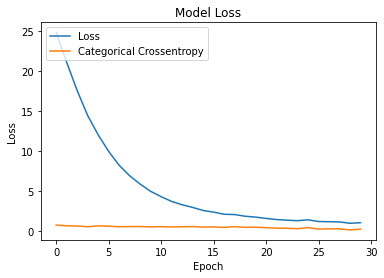

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt


import tensorflow as tf
import os

# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

x_train, y_train = load_data()
x_val, y_val = load_data()
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

save_weight_path = 'drive/MyDrive/res_tmp/inc_weights1211_original_data'
load_weight_path = ''
batch_size = 16
epoch = 30

AUC_Scores = []
ori_history = train_model(x_train, y_train, x_val, y_val, epoch, batch_size, save_weight_path, load_weight_path)

plt.plot(ori_history.history['categorical_accuracy'])
plt.plot(AUC_Scores)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Categorical Accuracy', 'AUC Score'], loc='upper left')
plt.show()

plt.plot(ori_history.history['loss'])
plt.plot(ori_history.history['categorical_crossentropy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Categorical Crossentropy'], loc='upper left')
plt.show()





# Testing Function

In [16]:
from pandas.io.parsers.python_parser import parser_defaults
import os
import numpy as np
# from mylib.densenet import get_compiled
import tensorflow as tf
import os
import pandas as pd
import sklearn.metrics

def load_test():
    x_test = np.ones((100, 32, 32, 32))
    i = 0
    path = TEST_PATH  
    path_list = os.listdir(path)
    path_list.sort()  
    for filename in path_list:
        tmp = np.load(os.path.join(path, filename))
        voxel = tmp['voxel']
        seg = tmp['seg']
        x_test[i] = (voxel * seg)[50 - 16:50 + 16, 50 - 16:50 + 16, 50 - 16:50 + 16]
        i = i + 1
    x_test = x_test.reshape(x_test.shape[0], 32, 32, 32, 1)
    return x_test

def save_sub(input_list):
  candidates = list()
  for c in os.listdir(TEST_PATH):
    candidates.append(c.split(".")[0])
  candidates.sort()
  data = {"name": candidates, "label": input_list[:, 1]}
  df = pd.DataFrame(data)
  df.to_csv(SUBMISSION_CSV)
  print('File saved')

def test_model(TEST_CSV, TEST_PATH, SUBMISSION_CSV, TRAIN_MODEL_PATH):
  x_test = load_test()
  model = get_compiled()
  score_map = {} 
  labels_map = {}
  test_score = []

  best_score = 0
  second_best_score = 0
  best_weights = -1
  second_best_weights = -1

  true_labels = pd.read_csv(TEST_CSV)['label']

  for i in range(1, 30):
      if i < 10:
        model_path = TRAIN_MODEL_PATH + "0" + str(i) + '.h5'
      else:
        model_path = TRAIN_MODEL_PATH + str(i) + '.h5'
      model.load_weights(model_path)
      res = model.predict(x_test, batch_size, verbose=1)

      save_sub(res)
      file = pd.read_csv(SUBMISSION_CSV)
      
      predicted_labels = file['label']
      labels_map[i] = predicted_labels
      score = sklearn.metrics.roc_auc_score(true_labels, predicted_labels)
      test_score.append(score)
      score_map[i] = score
      if score > best_score:
        best_score = score
        best_weights = i
      elif score > second_best_score:
        second_best_score = score
        second_best_weights = i

  first_score = 0
  best_i = 0
  best_j = 0
  for i in range (1, 30):
    for j in range(i + 1, 30):
      best1 = [i * 0.5 for i in labels_map[i]]
      best2 = [i * 0.5 for i in labels_map[j]]
      predicted_labels = np.sum([best1, best2], axis = 0)
      score = sklearn.metrics.roc_auc_score(true_labels, predicted_labels)
      if score > first_score:
        first_score = score
        best_i = i
        best_j = j

  print(first_score)
  print(best_i)
  print(best_j)
  # best1 = [i * 0.5 for i in labels_map[best_weights]]
  # best2 = [i * 0.5 for i in labels_map[second_best_weights]]
  # predicted_labels = np.sum([best1, best2], axis = 0)
  # score = sklearn.metrics.roc_auc_score(true_labels, predicted_labels)
  # print(score)
  print(score_map)
  print("Test AUC Mean",np.mean(np.array(test_score)))
  print()
  print("Epoch: " + str(best_weights))
  print(labels_map[best_weights])
  print()
  print("Epoch: " + str(second_best_weights))
  print(labels_map[second_best_weights])

# Test the Unaugmented Data Model

In [17]:

batch_size = 16
TEST_CSV = 'drive/MyDrive/dataset2/test_val.csv'
TEST_PATH = "drive/MyDrive/dataset2/test"
SUBMISSION_CSV = "drive/MyDrive/dataset2/result.csv"
TRAIN_MODEL_PATH = "drive/MyDrive/res_tmp/inc_weights1211_original_data."

test_model(TEST_CSV, TEST_PATH, SUBMISSION_CSV, TRAIN_MODEL_PATH)





/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
0.6712
10
14
{1: 0.6332, 2: 0.35240000000000005, 3: 0.6288, 4: 0.5956, 5: 0.6628000000000001, 6: 0.6215999999999999, 7: 0.6376, 8: 0.6444, 9: 0.6388, 10: 0.6616, 11: 0.6324, 12: 0.632, 13: 0.642, 14: 0.6859999999999999, 15: 0.6492, 16: 0.6379999999999999, 17: 0.6492, 18: 0.6384, 19: 0.6464, 20: 0.6619999999999999, 21: 0.5784, 22: 0.6504, 23: 0.528, 24: 0.6152, 25: 0.6612, 26: 0.6324000000000001, 27: 0.5484, 28: 0.6252, 29: 0.6048}
Test AUC Mean 0.6205655172413793

Epoch: 14
0     0.248033
1     0.248002
2     0.286626
3     0.250471
4     0.256768
        ...   
95    0.251600
96    0.309323
97    0.262313
98    0.303736
99    0.247847
Name: label, Length: 100, dtype: floa

# Get the Best Weight

In [18]:
import numpy
auc_original = numpy.array(AUC_Scores)
print(auc_original)
max_index = auc_original.argmax() + 1
max_val = np.max(auc_original)
min_val = np.min(auc_original)
mean_val = np.mean(auc_original)

print("Best Weight's Epoch is:", max_index)
print("Max Score is ", max_val)
print("Min Score is ", min_val)
print("Mean Score is ", mean_val)




[0.62398779 0.37593667 0.5934554  0.78287406 0.71637056 0.69476674
 0.67645637 0.69642857 0.67675852 0.69615664 0.70591612 0.70914914
 0.6974861  0.71739787 0.75401861 0.73011844 0.72667392 0.6501692
 0.75555958 0.78785956 0.86273266 0.74833817 0.93972081 0.74184191
 0.72211143 0.79801184 0.95053783 0.93262026 0.92150109 0.86073846]
Best Weight's Epoch is: 27
Max Score is  0.950537829344936
Min Score is  0.37593666908387713
Mean Score is  0.7415231447909112


# Train with the Augmented data and the best Weight

Labels loaded
365
Labels loaded
(1495, 32, 32, 32, 1) (1495, 2)
(365, 32, 32, 32, 1) (365, 2)


Weight Loaded! drive/MyDrive/res_tmp/inc_weights1211_original_data.27.h5
Train on 1495 samples, validate on 365 samples
Epoch 1/30
1495/1495 [==============================] - ETA: 0s - loss: 1.3158 - categorical_crossentropy: 0.5629 - categorical_accuracy: 0.7204

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



 ROC_AUC - epoch:1 - score:0.902586

Epoch 1: saving model to drive/MyDrive/res_tmp/inc_weights1211_aug_data.01.h5
1495/1495 [==============================] - 100s 67ms/sample - loss: 1.3158 - categorical_crossentropy: 0.5629 - categorical_accuracy: 0.7204 - val_loss: 1.2301 - val_categorical_crossentropy: 0.5960 - val_categorical_accuracy: 0.6164
Epoch 2/30
1495/1495 [==============================] - ETA: 0s - loss: 1.1049 - categorical_crossentropy: 0.4865 - categorical_accuracy: 0.7605
 ROC_AUC - epoch:2 - score:0.924643

Epoch 2: saving model to drive/MyDrive/res_tmp/inc_weights1211_aug_data.02.h5
1495/1495 [==============================] - 19s 13ms/sample - loss: 1.1049 - categorical_crossentropy: 0.4865 - categorical_accuracy: 0.7605 - val_loss: 1.0454 - val_categorical_crossentropy: 0.4636 - val_categorical_accuracy: 0.7671
Epoch 3/30
1495/1495 [==============================] - ETA: 0s - loss: 1.0260 - categorical_crossentropy: 0.4355 - categorical_accuracy: 0.7926
 ROC_AUC

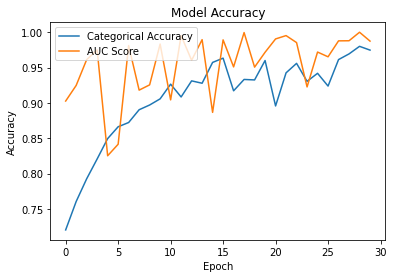

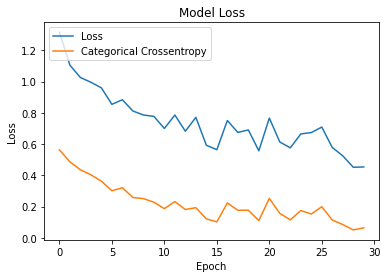

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt


import tensorflow as tf
import os

# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

x_train, y_train = load_data(True)
x_val, y_val = load_data()
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

save_weight_path = 'drive/MyDrive/res_tmp/inc_weights1211_aug_data'
if max_index < 10:
  load_weight_path = 'drive/MyDrive/res_tmp/inc_weights1211_original_data.' + "0" + str(max_index) + '.h5'
else:
  load_weight_path = 'drive/MyDrive/res_tmp/inc_weights1211_original_data.' + str(max_index) + '.h5'

batch_size = 16
epoch = 30

AUC_Scores = []
aug_history = train_model(x_train, y_train, x_val, y_val, epoch, batch_size, save_weight_path, load_weight_path)

plt.plot(aug_history.history['categorical_accuracy'])
plt.plot(AUC_Scores)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Categorical Accuracy', 'AUC Score'], loc='upper left')
plt.show()

plt.plot(aug_history.history['loss'])
plt.plot(aug_history.history['categorical_crossentropy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Categorical Crossentropy'], loc='upper left')
plt.show()

# Test the Augmented Data Model

In [20]:

batch_size = 16
TEST_CSV = 'drive/MyDrive/dataset2/test_val.csv'
TEST_PATH = "drive/MyDrive/dataset2/test"
SUBMISSION_CSV = "drive/MyDrive/dataset2/result.csv"
TRAIN_MODEL_PATH = "drive/MyDrive/res_tmp/inc_weights1211_aug_data."

test_model(TEST_CSV, TEST_PATH, SUBMISSION_CSV, TRAIN_MODEL_PATH)

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
File saved
0.6524
5
14
{1: 0.614, 2: 0.6352, 3: 0.588, 4: 0.584, 5: 0.6215999999999999, 6: 0.5256, 7: 0.5492, 8: 0.5996, 9: 0.40640000000000004, 10: 0.5216000000000001, 11: 0.5548000000000001, 12: 0.4988, 13: 0.6268, 14: 0.6528, 15: 0.45, 16: 0.522, 17: 0.4552, 18: 0.5444, 19: 0.6278, 20: 0.5132, 21: 0.5668, 22: 0.5908, 23: 0.592, 24: 0.5800000000000001, 25: 0.44920000000000004, 26: 0.44239999999999996, 27: 0.4532, 28: 0.6042, 29: 0.5412}
Test AUC Mean 0.548648275862069

Epoch: 14
0     0.619263
1     0.004368
2     0.884359
3     0.995597
4     0.980854
        ...   
95    0.000256
96    0.999750
97    0.995689
98    0.999970
99    0.018153
Name: label, Length: 100, dtype: float64


## More Statistics

In [14]:
import numpy
auc_aug = numpy.array(AUC_Scores)
print(auc_aug)
max_index = auc_aug.argmax() + 1
max_val = np.max(auc_aug)
min_val = np.min(auc_aug)
mean_val = np.mean(auc_aug)

print("Best Weight's Epoch is:", max_index)
print("Max Score is ", max_val)
print("Min Score is ", min_val)
print("Mean Score is ", mean_val)

[0.86551245 0.96192893 0.92893401 0.80399444 0.98108533 0.92059463
 0.97174885 0.86474196 0.91204375 0.96558496 0.91705946 0.95661107
 0.88596054 0.99492386 0.8809826  0.98591975 0.98800459 0.98709814
 0.97890984 0.98670534 0.93634427 0.96171743 0.99948634 0.72390923
 0.56651861 0.99607203 0.98350254 0.98619168 0.99332246 0.99749214]
Best Weight's Epoch is: 23
Max Score is  0.9994863427604544
Min Score is  0.5665186125211507
Mean Score is  0.9294300418983159
